In [20]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
%config IPCompleter.greedy=True

In [8]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [15]:
iris.data.shape

(150, 4)

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
# gaku_len gaku_width kaben_len kabe_width    which(0,1,2)
print(iris.data[0], iris.target[0])

[5.1 3.5 1.4 0.2] 0


In [21]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.loc[df['target'] == 0, 'target'] = "setosa"
df.loc[df['target'] == 1, 'target'] = "versicolor"
df.loc[df['target'] == 2, 'target'] = "virginica"

In [65]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


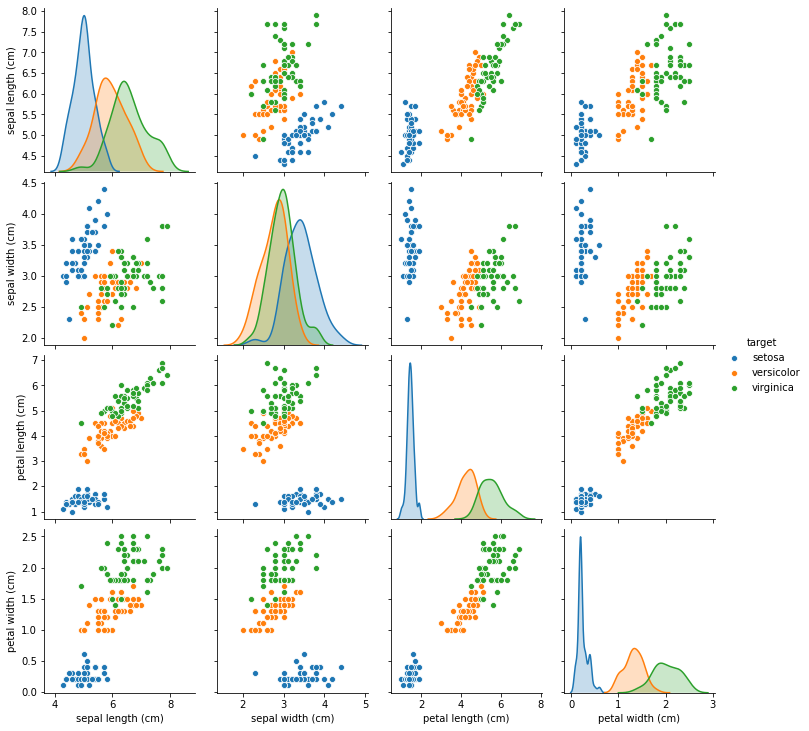

In [66]:
sns.pairplot(df, hue="target")

In [48]:
X = iris.data[:, [0, 1, 2]]
y = iris.target

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=334)

In [51]:
# 標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [53]:
model = SVC(kernel='linear', random_state=334)
model.fit(X_train_std, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=334, shrinking=True, tol=0.001,
    verbose=False)

In [54]:
prediction_train = model.predict(X_train_std)
accuracy_train = accuracy_score(y_train, prediction_train)
print(f"trainの正解率{accuracy_train}")

trainの正解率0.9666666666666667


In [55]:
prediction_test = model.predict(X_test_std)
accuracy_test = accuracy_score(y_test, prediction_test)
print(f"testの正解率{accuracy_test}")

testの正解率0.9


In [57]:
!pip install mglearn

     |████████████████████████████████| 540 kB 1.3 MB/s eta 0:00:01
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=49ad81f2fcb30c2cb658828fec433c7b398f114415d42401f963bf28ff83d8fd
  Stored in directory: /home/jovyan/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [58]:
import mglearn

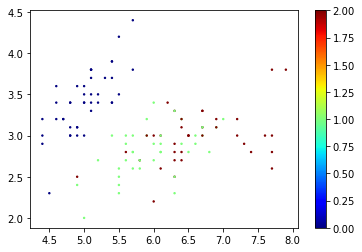

In [64]:
plt.scatter(X_train[:, 0], X_train[:, 1], s=2, c=y_train, cmap='jet')
plt.colorbar()
plt.show()